# Convolution Neural Network for Food Image Classification


**Link to Dataset: https://www.kaggle.com/kmader/food41**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Externship/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/trainset/chocolate_cake/3882119.jpg  
  inflating: dataset/trainset/chocolate_cake/3895991.jpg  
  inflating: dataset/trainset/chocolate_cake/3899563.jpg  
  inflating: dataset/trainset/chocolate_cake/3903548.jpg  
  inflating: dataset/trainset/chocolate_cake/3911387.jpg  
  inflating: dataset/trainset/chocolate_cake/391530.jpg  
  inflating: dataset/trainset/chocolate_cake/3917741.jpg  
  inflating: dataset/trainset/chocolate_cake/391963.jpg  
  inflating: dataset/trainset/chocolate_cake/397896.jpg  
  inflating: dataset/trainset/chocolate_cake/402090.jpg  
  inflating: dataset/trainset/chocolate_cake/414643.jpg  
  inflating: dataset/trainset/chocolate_cake/420700.jpg  
  inflating: dataset/trainset/chocolate_cake/433873.jpg  
  inflating: dataset/trainset/chocolate_cake/440195.jpg  
  inflating: dataset/trainset/chocolate_cake/440860.jpg  
  inflating: dataset/trainset/chocolate_cake/445014.jpg  
  inflating: da

### Step 1. Import the libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing .image import ImageDataGenerator

### Step 2. Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator (rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator (rescale= 1./255)

### Step 3. Define the dataset's trainset and testset

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/dataset/trainset',target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/testset',target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 5799 images belonging to 6 classes.
Found 201 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'chocolate_cake': 0,
 'french_fries': 1,
 'fried_rice': 2,
 'hamburger': 3,
 'pizza': 4,
 'samosa': 5}

### Step 4. Initialize the model

In [ ]:
model= Sequential()

### Step 5. Add Convolution Layer, Pooling and Flatten

In [ ]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

### Step 6. Add layers for the CNN

In [ ]:
model.add(Dense(units=128, kernel_initializer="random_uniform", activation= "relu"))
model.add(Dense(units=256, kernel_initializer="random_uniform", activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units=256, kernel_initializer="random_uniform", activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units=6, kernel_initializer="random_uniform", activation= "softmax"))

### Step 7. Compile the model

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy" , metrics=["accuracy"])

### Step 8. Train the model

In [ ]:
model.fit(x_train, epochs=60, steps_per_epoch= 60, validation_data= x_test, validation_steps=20)

Epoch 1/60
60/60 [==============================] - 17s 282ms/step - loss: 1.3299 - accuracy: 0.4818 - val_loss: 1.4654 - val_accuracy: 0.4428
Epoch 2/60
60/60 [==============================] - 16s 261ms/step - loss: 1.2652 - accuracy: 0.5089
Epoch 3/60
60/60 [==============================] - 16s 261ms/step - loss: 1.2718 - accuracy: 0.5078
Epoch 4/60
60/60 [==============================] - 16s 258ms/step - loss: 1.2452 - accuracy: 0.5129
Epoch 5/60
60/60 [==============================] - 16s 261ms/step - loss: 1.2462 - accuracy: 0.5255
Epoch 6/60
60/60 [==============================] - 16s 258ms/step - loss: 1.2268 - accuracy: 0.5288
Epoch 7/60
60/60 [==============================] - 16s 260ms/step - loss: 1.2006 - accuracy: 0.5303
Epoch 8/60
60/60 [==============================] - 16s 261ms/step - loss: 1.1945 - accuracy: 0.5516
Epoch 9/60
60/60 [==============================] - 16s 261ms/step - loss: 1.1710 - accuracy: 0.5599
Epoch 10/60
60/60 [==============================

### Step 9. Save the model 

In [ ]:
#extension: h5
model.save("food.h5")
#saved in same directory

### Step 10. Test the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model= load_model("food.h5")

In [ ]:
food=['chocolate_cake','french_fries','fried_rice','hamburger','pizza','samosa']

**Individual Test 1- Pizza**

In [ ]:
img=image.load_img("pizza_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 4

4

**Individual Test 2- French Fries**

In [ ]:
img=image.load_img("frenchfries_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 1

4

**Individual Test 3- Chocolate Cake**

In [ ]:
img=image.load_img("choccake_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 0

0

**Individual Test 4- Fried Rice**

In [ ]:
img=image.load_img("friedrice_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 2

2

**Individual Test 5- Samosa**

In [ ]:
img=image.load_img("samosa_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 5

4

**Individual Test 6- Hamburger**

In [ ]:
img=image.load_img("hamburger_test.jpg", target_size= (64,64))
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)
type(x)

numpy.ndarray

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=np.argmax(model.predict(x))
pred
#expected- 3

3

### Result:

Individual Test 1- Correct

Individual Test 2- Incorrect

Individual Test 3- Correct

Individual Test 4- Correct

Individual Test 5- Incorrect

Individual Test 6- Correct


prediction:  hamburger


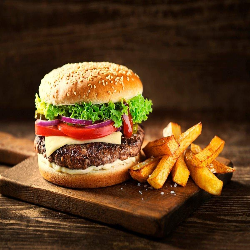

In [ ]:
img=image.load_img("hamburger_test.jpg", target_size= (64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
print("prediction: ",food[pred])
from google.colab.patches import cv2_imshow
img = cv2.imread("hamburger_test.jpg")
img = cv2.resize(img, (250, 250))
cv2_imshow(img)

prediction:  chocolate_cake


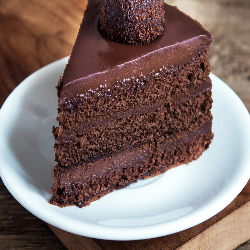

In [ ]:
img=image.load_img("choccake_test.jpg", target_size= (64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
print("prediction: ",food[pred])
img = cv2.imread("choccake_test.jpg")
img = cv2.resize(img, (250, 250))
cv2_imshow(img)